In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import regularizers
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


### DATA PREPROCESSING, SPLITTING AND TRAINING MODEL

Found 72 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.6875 - loss: 1.3949 - val_accuracy: 1.0000 - val_loss: 0.8491
Epoch 2/20
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 1.0000 - loss: 0.8491

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.8491 - val_accuracy: 1.0000 - val_loss: 0.8003
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 1.0000 - loss: 0.7853 - val_accuracy: 1.0000 - val_loss: 0.7109
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.7109 - val_accuracy: 1.0000 - val_loss: 0.6678
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 1.0000 - loss: 0.6624 - val_accuracy: 1.0000 - val_loss: 0.5878
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.5878 - val_accuracy: 1.0000 - val_loss: 0.5506
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 1.0000 - loss: 0.5318 - val_accuracy: 1.0000 - val_loss: 0.4823
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 1.0000 - loss: 0.4823 - val_accuracy: 1.0000 - val_loss: 0.4513
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 1.0000 - loss: 0.4358 - val_accuracy: 1.0000 - val_loss: 0.3953
Epoch 10/20
2/2 ━━━━━━━━━━━

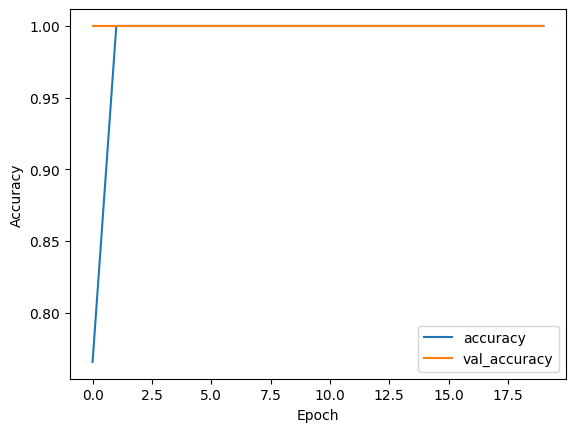

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.1740
Validation Accuracy: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


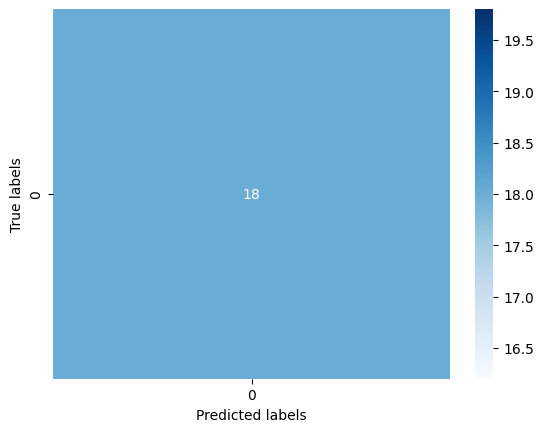

In [2]:
# Define directories for the dataset
data_dir = r"C:\Users\DELL\Desktop\Mentorness\2nd task\Skin_Disease_Classification"

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Create ImageDataGenerator for data augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Splitting the data into 80% train and 20% validation
)

# Generate batches of augmented data for training and validation
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Specify the subset as 'training' for the training set
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Specify the subset as 'validation' for the validation set
)

# Get the number of classes from the generators
num_classes = len(train_generator.class_indices)

# Calculate class weights to handle class imbalance
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

# Convert class weights to a dictionary format
class_weights = dict(enumerate(class_weights))

# Define the model architecture with dropout and regularization
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(num_classes, activation='softmax') 
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks (e.g., early stopping, model checkpoint)
callbacks = [
    EarlyStopping(patience=5, monitor='val_loss'),
    ModelCheckpoint(filepath='best_model.keras', save_best_only=True, monitor='val_loss')
]

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    class_weight=class_weights,  # Use the calculated class weights
    callbacks=callbacks
)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_generator)
print("Validation Accuracy:", val_accuracy)

# Generate predictions
predictions = model.predict(val_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = val_generator.classes

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(true_classes, predicted_classes))

conf_mat = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [3]:
import os

# Define the file path
file_path = r"C:\Users\DELL\Desktop\ooo.jpg"

# Check if the file exists
if os.path.exists(file_path):
    print("The file exists.")
else:
    print("The file does not exist or the path is incorrect.")


The file exists.


### MODEL SUMMARY

In [4]:
# Print the model summary to see the expected input shape
print(model.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,360,904 (39.52 MB)

 Trainable params: 3,453,634 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,907,270 (26.35 MB)

None


### MODEL DEPLOYMENT FOR PREDICTION
   ## using webcam

In [5]:
# Load the trained model
model = load_model('best_model.keras')

# Define the class labels
class_labels = ['acne', 'redness', 'bags']  # Assuming these are the class labels in your dataset

# Function to preprocess the image
def preprocess_image(img):
    img = cv2.resize(img, (img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize the image
    return img_array

# Function to make predictions
def predict_image(img):
    img = preprocess_image(img)
    predictions = model.predict(img)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class_label = class_labels[predicted_class_index]
    return predicted_class_label

# Function to capture image from webcam
def capture_image():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Error: Unable to access webcam.")
        return
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Failed to capture frame.")
            break
        cv2.imshow('Webcam', frame)
        if cv2.waitKey(1) & 0xFF == ord('s'):  # Press 's' to capture image
            cv2.imwrite('captured_image.jpg', frame)
            break
    cap.release()
    cv2.destroyAllWindows()

# Capture image from webcam
capture_image()

# Read the captured image
img = cv2.imread('captured_image.jpg')

# Make predictions
prediction = predict_image(img)

print("Predicted class:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Predicted class: redness


### MODEL DEPLOYMENT FOR PREDICTION
   ## using image from directory

In [6]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the trained model
model = load_model('best_model.keras')

# Define the class labels
class_labels = ['acne', 'redness', 'bags']  # Assuming these are the class labels in your dataset

# Define the file path to the image
file_path = r"C:\Users\DELL\Desktop\front.jpg"

# Set the expected input image size
img_width, img_height = 148, 148

# Function to preprocess the image
def preprocess_image(img):
    img = cv2.resize(img, (img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize the image
    return img_array

# Function to make predictions
def predict_image(img):
    img = preprocess_image(img)
    predictions = model.predict(img)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class_label = class_labels[predicted_class_index]
    return predicted_class_label

# Read the image file
img = cv2.imread(file_path)

# Make predictions
prediction = predict_image(img)

print("Predicted class:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predicted class: redness


### VISUALIZATION FOR MODEL PERFORMANCE ANALYSIS

## Plotting Sample Images with Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


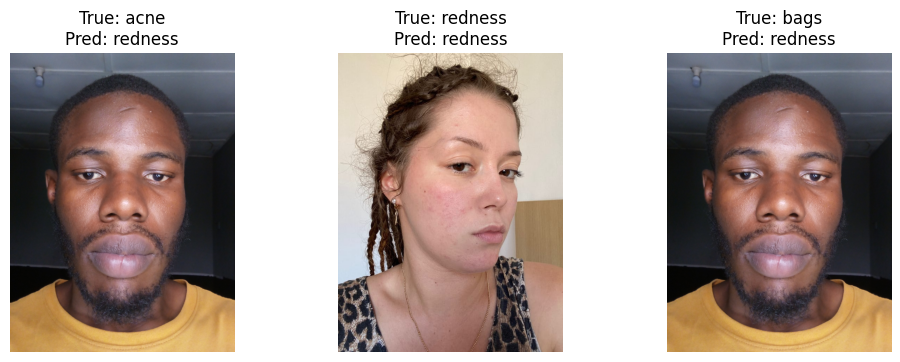

In [7]:
def plot_sample_images_with_predictions(images, true_labels, predictions):
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        plt.subplot(3, 3, i + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(f"True: {true_labels[i]}\nPred: {predictions[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Load some images for testing
image_paths = [file_path, r"C:\Users\DELL\Desktop\kkk.jpg", r"C:\Users\DELL\Desktop\front.jpg"]
true_labels = ['acne', 'redness', 'bags']  # Corresponding true labels
images = [cv2.imread(path) for path in image_paths]
predictions = [predict_image(img) for img in images]

plot_sample_images_with_predictions(images, true_labels, predictions)


### Confusion Matrix Visualization

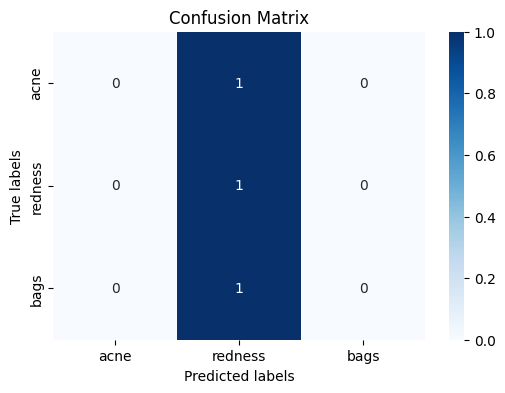

In [8]:
# Assuming you have lists of true labels and predicted labels
true_labels = ['acne', 'redness', 'bags']  # Replace with actual true labels
predicted_labels = predictions  # Predictions from the model

# Generate confusion matrix
conf_mat = confusion_matrix(true_labels, predicted_labels, labels=class_labels)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### Class Distribution of Predictions

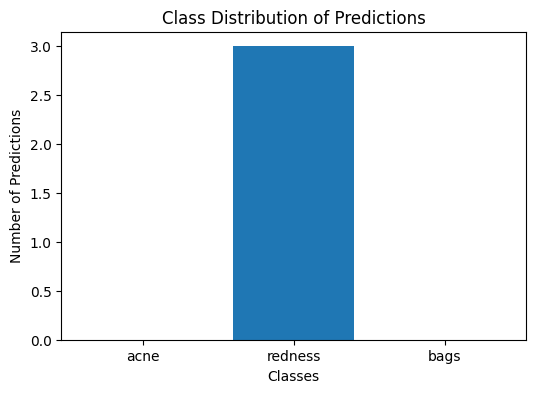

In [9]:
from collections import Counter

# Define the true labels
true_labels = ['acne', 'redness', 'bags']

# Count the occurrences of each predicted class
predicted_counts = Counter(predictions)

# Plot the distribution
plt.figure(figsize=(6, 4))
plt.bar(true_labels, [predicted_counts[label] for label in true_labels])
plt.xlabel('Classes')
plt.ylabel('Number of Predictions')
plt.title('Class Distribution of Predictions')
plt.show()


### Prediction Confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


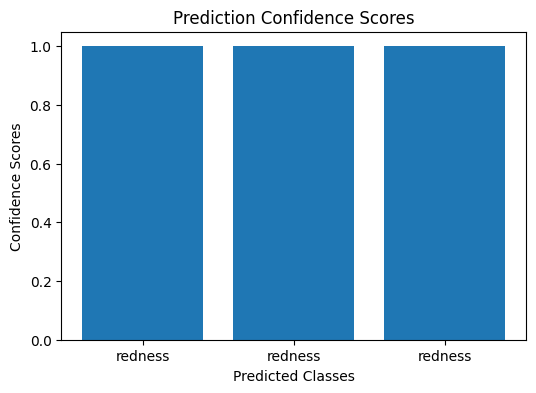

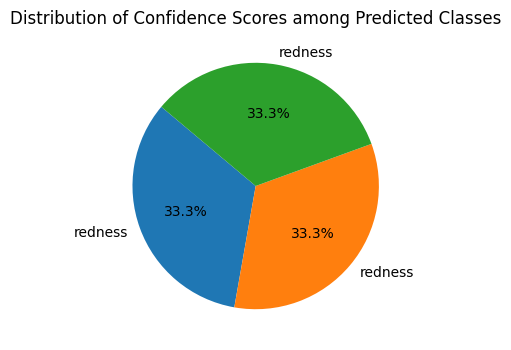

In [10]:
# Function to make predictions and get confidence scores
def predict_image_with_confidence(img):
    img = preprocess_image(img)
    predictions = model.predict(img)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class_label = true_labels[predicted_class_index]  # Use true_labels instead of class_labels
    confidence_score = predictions[0][predicted_class_index]
    return predicted_class_label, confidence_score

# Make predictions with confidence scores
predictions_with_confidence = [predict_image_with_confidence(img) for img in images]

# Plot confidence scores
labels = [pred[0] for pred in predictions_with_confidence]
confidence_scores = [pred[1] for pred in predictions_with_confidence]

plt.figure(figsize=(6, 4))
plt.bar(range(len(confidence_scores)), confidence_scores)
plt.xticks(range(len(confidence_scores)), labels)
plt.xlabel('Predicted Classes')
plt.ylabel('Confidence Scores')
plt.title('Prediction Confidence Scores')
plt.show()

# Calculate the total confidence scores
total_confidence = sum(confidence_scores)

# Calculate the percentage of confidence for each predicted class
confidence_percentages = [score / total_confidence * 100 for score in confidence_scores]

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(confidence_percentages, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Confidence Scores among Predicted Classes')
plt.show()
